<a href="https://colab.research.google.com/github/Fermasango28/Fermasango28/blob/main/Predicccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("/content/sales_predictions.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
for i in df:
  print(df[i].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

Item_Fat_Content modificar
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112

In [5]:
df["Item_Fat_Content"].replace("LF", "Low Fat",inplace = True)
df["Item_Fat_Content"].replace("reg", "Regular",inplace = True)
df["Item_Fat_Content"].replace("low fat", "Low Fat",inplace = True)

In [6]:
df = df[df["Item_Visibility"]> 0]

Los locales que más venden son los que Tier 3.

In [7]:
df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()

Outlet_Location_Type
Tier 1    4.223880e+06
Tier 2    6.066612e+06
Tier 3    7.131576e+06
Name: Item_Outlet_Sales, dtype: float64

In [8]:
df1 = df.groupby(["Item_Type"])["Item_MRP","Item_Outlet_Sales"].mean()

<ipython-input-8-5e1afd2dc174>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(["Item_Type"])["Item_MRP","Item_Outlet_Sales"].mean()


El producto menos vendido es la comida marina

In [9]:
df1["Item_Outlet_Sales"] = df.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
df1 = df1.sort_values(by = "Item_Outlet_Sales")
df1

,Item_MRP,Item_Outlet_Sales
Item_Type,,
Seafood,139.897653,1.382201e+05
Breakfast,141.404351,2.268148e+05
Starchy Foods,147.282323,3.046235e+05
Others,133.177460,3.048652e+05
Hard Drinks,136.980029,4.216318e+05
Breads,140.617709,5.088317e+05
Soft Drinks,131.184960,8.221964e+05
Meat,140.257052,8.770104e+05
Health and Hygiene,131.348089,9.753384e+05


In [10]:
df2 = df.groupby(["Item_Visibility"])["Item_MRP","Item_Outlet_Sales"].mean()
df2["Item_Outlet_Sales"] = df.groupby(["Item_Visibility"])["Item_Outlet_Sales"].sum()
df2.sort_values(by = "Item_Outlet_Sales",inplace= True)
df2 = df2.reset_index()

<ipython-input-10-a4bb22a821b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(["Item_Visibility"])["Item_MRP","Item_Outlet_Sales"].mean()


Se puede apreciar que ni aunque tenga mayor visibilidad el costo y ganancias promedio aumentan.

In [11]:
df3 = df2[df2["Item_Visibility"] > df2["Item_Visibility"].mean()]
df3.mean()

Item_Visibility         0.118867
Item_MRP              140.857125
Item_Outlet_Sales    2076.748821
dtype: float64

In [12]:
df4 = df2[df2["Item_Visibility"] <= df2["Item_Visibility"].mean()]
df4.mean()

Item_Visibility         0.036500
Item_MRP              141.209191
Item_Outlet_Sales    2304.765151
dtype: float64

In [13]:
import matplotlib.pyplot as plt

Se puede apreciar que el local que más vende es el TIER3

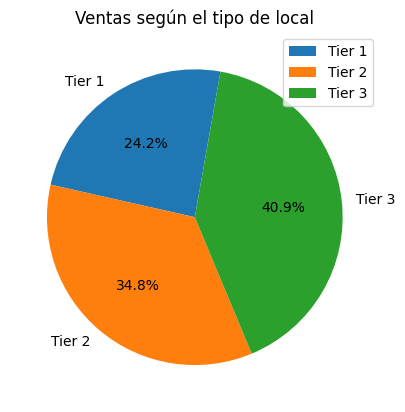

In [14]:
df_local = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()
plt.figure(dpi=100)
plt.pie(df_local.values, labels = df_local.index,autopct="%.1f%%",startangle=80)
plt.title("Ventas según el tipo de local")
plt.legend(loc='upper right')
plt.show()


Se aprecia que los productos más vendidos son los vegetales y frutas y los snacks, no solo en cantidad sino tambien en ventas.

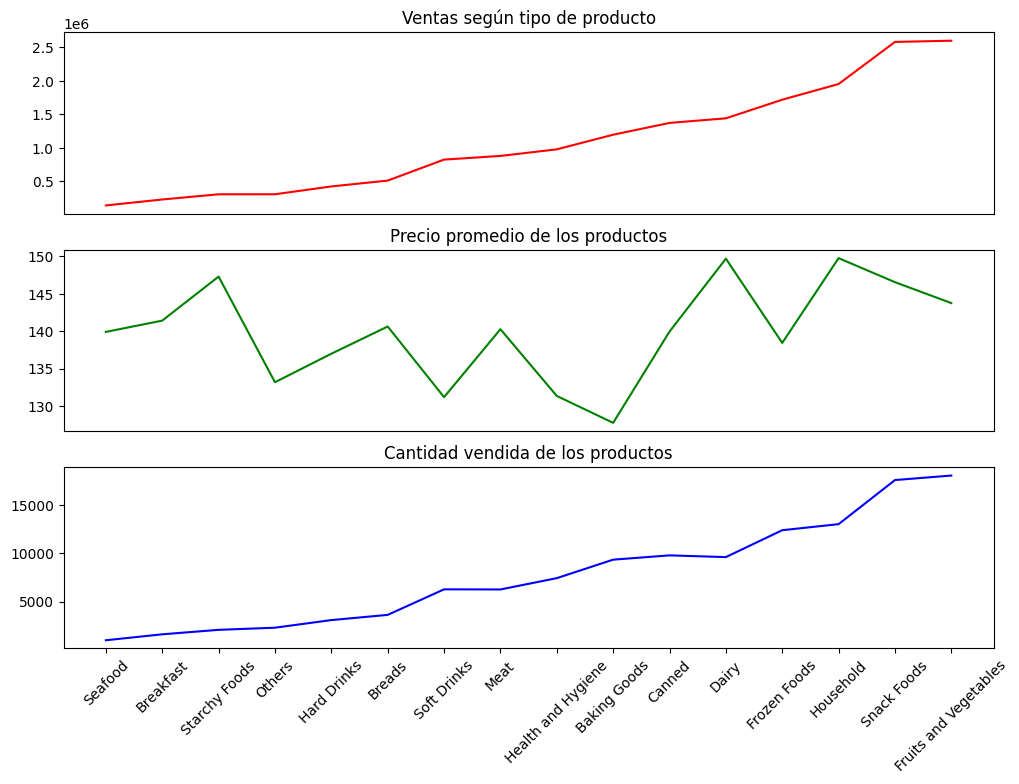

In [15]:
df1["Cantidad"] = round(df1["Item_Outlet_Sales"]/df1["Item_MRP"])
plt.figure(figsize = (12,8))
ax1 = plt.subplot(3,1,1)
ax1.plot(df1.index, df1["Item_Outlet_Sales"],c="red")
ax1.set_title("Ventas según tipo de producto")
ax1.get_xaxis().set_visible(False)
ax2 = plt.subplot(3,1,2)
ax2.plot(df1.index, df1["Item_MRP"],c="green")
ax2.set_title("Precio promedio de los productos")
ax2.get_xaxis().set_visible(False)
ax3 = plt.subplot(3,1,3)
ax3.plot(df1.index, df1["Cantidad"],c="blue")
ax3.set_title("Cantidad vendida de los productos")
ax3.tick_params(axis='x', rotation=45)
plt.show()